In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# import the other jupyter notebook

In [19]:
import import_ipynb # pip install import_ipynb
import module_making

In [20]:
df = pd.read_csv('champagne.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [21]:
# rename the column

In [22]:
df.rename(columns = {'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'}, inplace=True)

In [23]:
# null values

In [24]:
df.isna().sum()

Month    1
Sales    2
dtype: int64

In [25]:
df.dropna(inplace=True) 

In [26]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [27]:
# convert object to date-time & set it as index

In [28]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True) # date should be index in time series data

In [29]:
# visualize the data

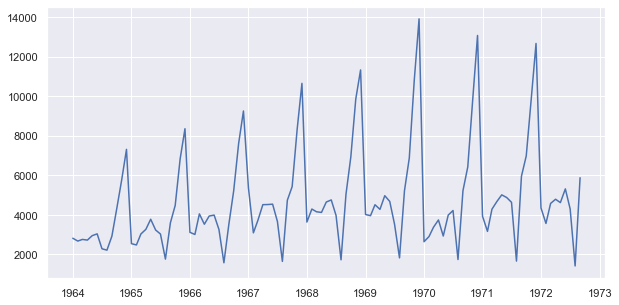

In [30]:
sns.set()
fig = plt.figure(figsize=(10, 5))
plt.plot(df);

In [36]:
# data seems seasonal, as the sale tends to increase during year end

In [37]:
# check stationarity

(-1.8335930563276237, 0.3639157716602447, 11, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, 1478.4633060594724) 

test statistics:    -1.833593
p-value:             0.363916
lags-used:          11.000000
no. of obs used:    93.000000
dtype: float64

 critical value:  1% => -3.502704609582561

 critical value:  5% => -2.8931578098779522

 critical value:  10% => -2.583636712914788


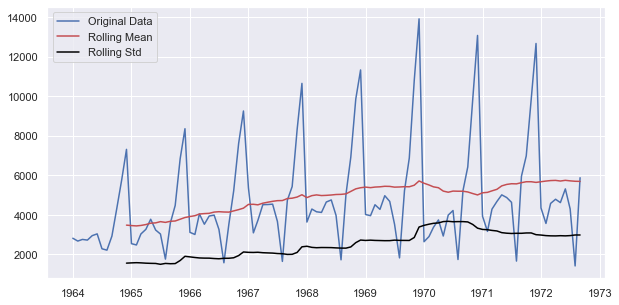

In [31]:
module_making.ts(df) # rolling-satistics & dickey-fuller test

In [ ]:
'''
as we can see the p-value > 0.05
also, from the graph we can see that mean is also not constant (increasing trend)
=> hence data is not stationary
'''

In [40]:
# make the data stationary

,Sales
Month,
1964-01-01,7.942718
1964-02-01,7.890583
1964-03-01,7.921173
1964-04-01,7.908755
1964-05-01,7.988204


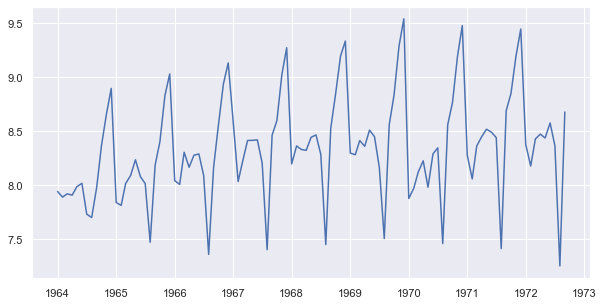

In [32]:
log_df = np.log(df)

fig = plt.figure(figsize=(10, 5)); 
plt.plot(log_df);

log_df.head()

(-2.255118601284443, 0.1868517311168676, 13, 91, {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}, -49.19143751582999) 

test statistics:    -2.255119
p-value:             0.186852
lags-used:          13.000000
no. of obs used:    91.000000
dtype: float64

 critical value:  1% => -3.50434289821397

 critical value:  5% => -2.8938659630479413

 critical value:  10% => -2.5840147047458037


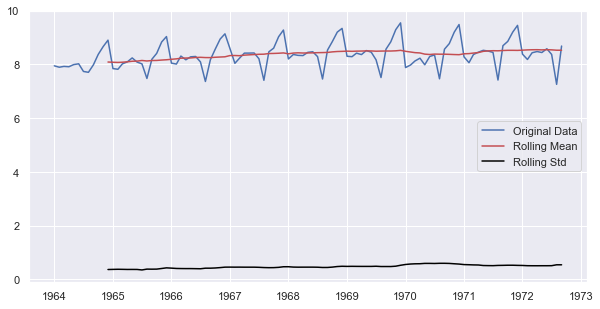

In [33]:
# checking stationary
module_making.ts(log_df)

In [43]:
# differencing

In [34]:
lag_12 = log_df.shift(periods=12) # taking lag per 12 months
display(
    log_df.head(15),
    lag_12.head(15)
)

,Sales
Month,
1964-01-01,7.942718
1964-02-01,7.890583
1964-03-01,7.921173
1964-04-01,7.908755
1964-05-01,7.988204
1964-06-01,8.018296
1964-07-01,7.732808
1964-08-01,7.701652
1964-09-01,7.980024


,Sales
Month,
1964-01-01,NaN
1964-02-01,NaN
1964-03-01,NaN
1964-04-01,NaN
1964-05-01,NaN
1964-06-01,NaN
1964-07-01,NaN
1964-08-01,NaN
1964-09-01,NaN


In [35]:
shifted_df = log_df - lag_12
print(shifted_df.head())
shifted_df.dropna(inplace=True)

            Sales
Month            
1964-01-01    NaN
1964-02-01    NaN
1964-03-01    NaN
1964-04-01    NaN
1964-05-01    NaN


(-3.617320904920117, 0.005438393674347496, 2, 90, {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}, -53.918041343561185) 

test statistics:    -3.617321
p-value:             0.005438
lags-used:           2.000000
no. of obs used:    90.000000
dtype: float64

 critical value:  1% => -3.505190196159122

 critical value:  5% => -2.894232085048011

 critical value:  10% => -2.5842101234567902


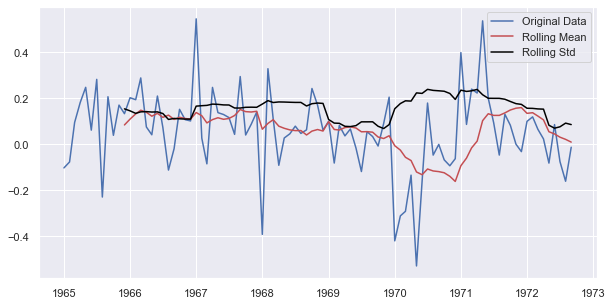

In [36]:
# checking stationary
module_making.ts(shifted_df)

In [52]:
# stationary data achieved

In [53]:
# ARIMA

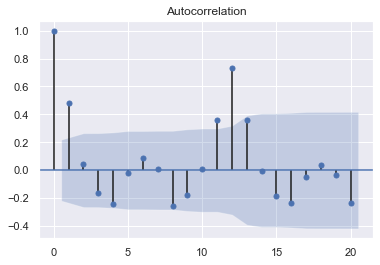

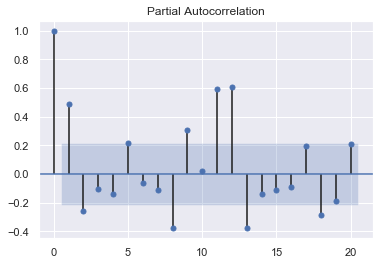

In [37]:
X = df[:80]
y = df[80:]

module_making.acf_pacf_plots(X)

In [58]:
# train the model

,Mean Absolute Error,Mean_Squared_Error,Mean_Absolute_Percentage_Error,Root_Mean_Squared_Error
Values,2226.802885,8.730057e+06,52.440723,2954.66691


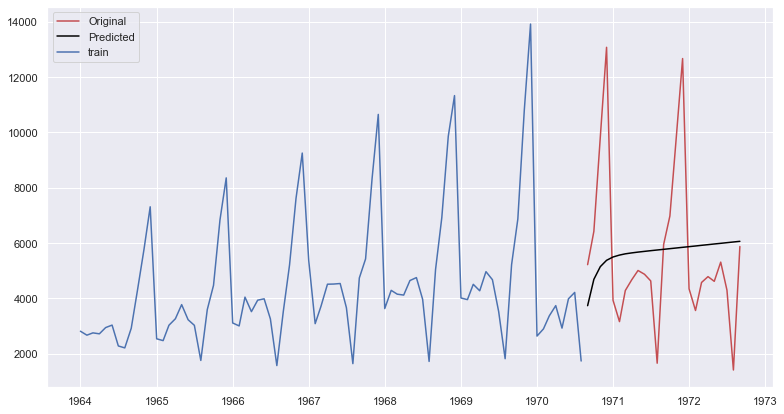

In [38]:
from statsmodels.tsa.arima_model import ARIMA # pip install statsmodels==0.11.0rc1

model = ARIMA(X, order=(1, 1, 1))
res = model.fit()
pred = res.predict(start=y.index[0], end=y.index[-1], typ='levels')
# levels give the result back on the same scale

df_pred = pd.DataFrame({'Actual':y.Sales, 'Predicted':pred}) 
# creating a new dataframe to visualize the graph
fig = plt.figure(figsize=(13, 7));
plt.plot(df_pred.Actual, color='r', label='Original')
plt.plot(df_pred.Predicted, color='black', label='Predicted')
plt.plot(X.Sales, color='b', label='train')
plt.legend();

module_making.evaluate_forecast(y.Sales, pred) # to check results

In [73]:
# seasonal arima

In [39]:
import statsmodels.api as sm

,Mean Absolute Error,Mean_Squared_Error,Mean_Absolute_Percentage_Error,Root_Mean_Squared_Error
Values,801.736469,882051.701507,16.058701,939.176076


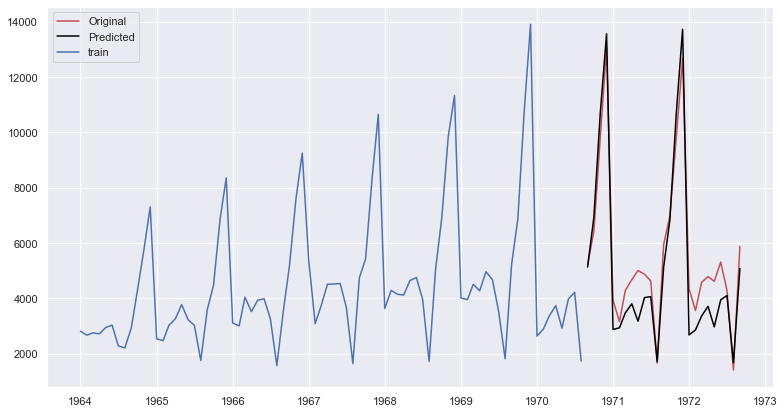

In [40]:
model = sm.tsa.statespace.SARIMAX(X, order=(1, 1, 1), seasonal_order=(1,1,1,12))
res = model.fit()
pred = res.predict(start=y.index[0], end=y.index[-1], typ='levels')

df_pred = pd.DataFrame({'Actual':y.Sales, 'Predicted':pred}) 
# creating a new dataframe to visualize the graph
fig = plt.figure(figsize=(13, 7));
plt.plot(df_pred.Actual, color='r', label='Original')
plt.plot(df_pred.Predicted, color='black', label='Predicted')
plt.plot(X.Sales, color='b', label='train')
plt.legend();

module_making.evaluate_forecast(y.Sales, pred)